### HIERARCHICAL CLUSTRING-

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

###### DATA PREPROCESSING

In [6]:
# READ THE DATA
df=pd.read_csv("D:\google_review_ratings.csv",index_col=0, header=0)
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN


In [7]:
print(df.shape)
df.describe(include="all")

(5456, 25)


,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,NaN,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,NaN,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,NaN,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,NaN,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,NaN,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,NaN,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  C

In [11]:
df.drop(["Unnamed: 25"] , axis =1,inplace=True)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [13]:
for i in df:
    print({i:df[i].unique()}) # checking the uunoque values in all column

{'Category 1': array([0.  , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,
       0.6 , 0.61, 0.62, 0.63, 0.64, 0.67, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.76, 0.83, 0.77, 0.85, 0.8 , 0.82, 0.87, 0.9 , 0.92, 0.94,
       0.96, 0.98, 1.  , 1.02, 1.03, 1.06, 1.12, 1.13, 1.15, 1.17, 1.19,
       1.2 , 1.22, 1.24, 1.21, 1.23, 1.28, 1.26, 1.25, 1.33, 0.75, 5.  ,
       1.39, 0.68, 0.78, 0.81, 0.86, 0.79, 0.84, 1.04, 1.09, 1.8 , 1.01,
       1.58, 1.6 , 1.27, 1.3 , 1.32, 1.7 , 1.42, 1.45, 1.41, 1.43, 1.46,
       1.48, 1.5 , 1.54, 1.4 , 1.37, 1.36, 1.35, 1.38, 1.34, 1.44, 1.47,
       1.49, 1.51, 1.52, 1.53, 1.55, 1.56, 1.57, 1.59, 1.61, 1.64, 1.65,
       1.68, 1.71, 1.74, 1.76, 1.78, 2.03, 2.05, 2.07, 2.09, 2.1 , 2.12,
       2.14, 2.16, 2.18, 2.2 , 2.22, 2.24, 2.32, 2.33, 2.35, 2.37, 2.39,
       2.41, 2.43, 2.45, 2.47, 2.48, 2.19, 2.21, 2.23, 2.26, 2.27, 2.29,
       2.31, 2.34, 2.36, 2.38, 2.4 , 1.98, 1.72, 1.62, 2.91, 1.18, 1.08,
       1.1 , 1.14, 1.16, 0.97, 0.99,

In [12]:
df.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [14]:
df[(df["Category 12"].isnull())|(df["Category 24"].isnull())]

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1348,1.06,1.10,5.00,3.28,5.00,5.00,5.00,1.83,1.81,5.00,5,1.74,1.73,1.74,1.77,1.80,0.0,0.00,0.0,0.00,0.0,5.0,0.26,NaN
User 2713,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,2\t2.,NaN,0.84,5.00,5.00,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.00,2.57


In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(5454, 24)

In [17]:
df.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

In [18]:
df["Category 11"].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [19]:
#df.drop(df[df["Category 11']=='2\t2."].index,inplace=True) when it is not run then we wre use it

In [23]:
df["Category 11"]=df["Category 11"].astype(float)

In [24]:
df.duplicated().sum()

np.int64(3)

In [28]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(5451, 24)

In [27]:
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [29]:
df.columns= ['churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

In [30]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 6,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [31]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000
mean,1.456353,2.321123,2.488580,2.797112,2.958437,2.893300,3.351214,2.541482,3.127004,2.832352,2.549184,2.077999,2.125443,2.190083,2.205793,1.192779,0.949633,0.822060,0.969523,1.000176,0.965806,1.750116,1.531704,1.561238
std,0.827472,1.421176,1.247208,1.309352,1.338420,1.281983,1.413100,1.111569,1.356976,1.307326,1.381390,1.249012,1.406508,1.576454,1.715881,1.107408,0.973789,0.946455,1.203125,1.193227,0.928305,1.597876,1.316198,1.171704
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.690000,2.740000,4.100000,4.310000,3.835000,5.000000,3.190000,5.000000,3.525000,3.210000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


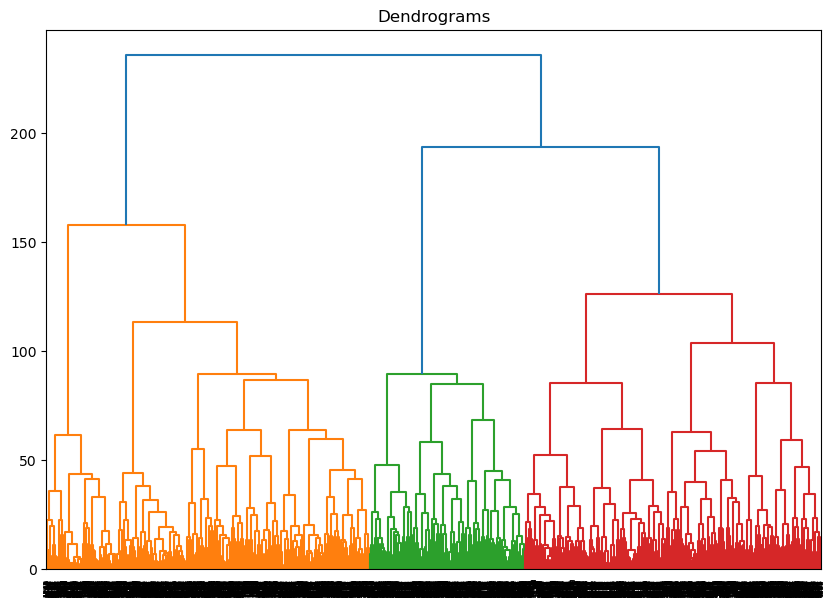

In [32]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

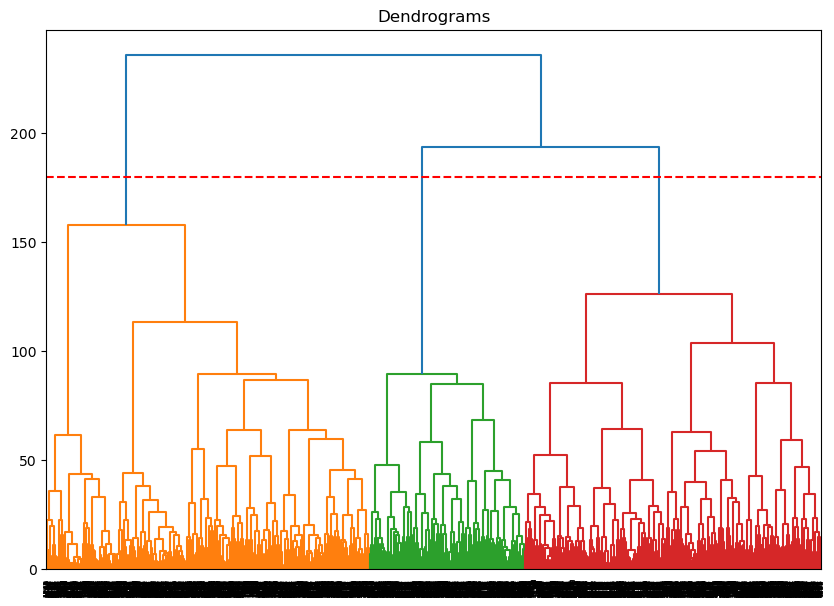

In [33]:
#adsplittib hear clustring ko km krre h divide kr hing 
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=180, color='r', linestyle='--')


In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', 
                                  linkage='ward')  
Y_pred=cluster.fit_predict(df)
print(Y_pred)

[1 1 1 ... 2 2 2]


In [35]:
df["Clusters"]=Y_pred
df

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,1
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,1
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,1
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,1
User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,1.71,1.69,1.69,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,2
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,1
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,2


In [36]:
df["Clusters"].value_counts()

Clusters
0    2277
1    2084
2    1090
Name: count, dtype: int64

In [40]:
cluster_1_df=df[df["Clusters"]==1]
print(cluster_1_df.shape)
cluster_1_df.sample(10)

(2084, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 4795,1.93,1.92,1.94,1.97,2.91,1.94,3.25,3.08,3.10,3.49,5.00,1.70,5.00,1.00,1.21,1.12,1.12,0.66,0.64,0.63,0.64,2.90,1.99,1.57,1
User 2848,1.30,1.30,5.00,4.13,4.77,5.00,2.84,2.66,1.70,1.65,1.69,0.83,0.81,0.81,0.84,1.07,0.60,0.58,0.56,0.58,0.67,5.00,1.18,5.00,1
User 3920,1.84,5.00,2.35,5.00,5.00,2.06,3.25,3.26,2.93,2.94,2.06,3.98,1.42,5.00,1.60,0.95,0.93,0.78,0.78,0.76,0.76,0.78,5.00,5.00,1
User 2333,1.62,2.34,5.00,1.70,1.80,1.77,1.73,1.72,1.76,1.77,2.14,2.16,1.16,1.14,1.15,1.33,1.36,0.59,0.56,0.55,0.56,5.00,0.61,1.63,1
User 4077,1.11,1.15,1.83,3.26,4.25,5.00,5.00,2.61,2.60,2.59,1.76,1.73,1.72,1.74,1.87,0.53,0.00,0.00,0.00,0.00,0.51,1.08,1.07,1.08,1
User 4147,1.96,2.79,5.00,5.00,1.62,1.59,1.56,1.55,1.58,1.58,1.87,0.91,0.89,0.88,0.89,0.91,1.20,0.75,0.73,0.72,0.73,5.00,5.00,1.41,1
User 5016,1.20,2.08,5.00,5.00,4.30,5.00,5.00,1.86,2.53,1.71,1.65,1.63,1.62,1.63,1.43,1.77,3.10,0.00,0.00,0.00,1.67,1.18,1.16,1.18,1
User 1201,2.30,2.45,2.45,2.48,5.00,3.78,4.22,2.71,2.71,2.73,1.83,5.00,1.01,0.96,0.95,0.97,1.04,1.00,1.04,0.99,0.98,4.22,5.00,5.00,1
User 3957,1.63,2.44,2.64,2.64,5.00,3.24,3.23,2.77,2.76,2.76,2.78,3.84,3.85,5.00,0.77,0.77,0.79,0.00,0.89,0.79,0.91,0.91,0.93,5.00,1


In [39]:
cluster_2_df=df[df["Clusters"]==2]
print(cluster_2_df.shape)
cluster_2_df.sample(10)


(1090, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,,,,,
User 795,2.11,2.09,2.07,2.06,2.08,1.78,1.95,1.58,1.57,1.55,1.56,1.87,2.13,1.52,1.42,1.34,1.36,1.38,5.00,0.80,2.14,2.13,2.14,2.17,2
User 4400,1.57,1.96,1.59,1.92,1.90,1.90,1.93,2.57,2.56,2.57,2.19,2.18,2.19,2.71,5.00,5.00,5.00,5.00,0.00,0.60,0.74,1.55,1.53,1.53,2
User 1819,0.95,1.00,1.01,2.76,2.74,2.75,2.50,1.84,1.58,1.20,1.18,1.18,1.30,1.42,5.00,0.68,0.67,0.69,5.00,0.95,0.93,0.94,0.93,0.94,2
User 4395,1.55,1.59,1.59,1.92,1.90,1.90,1.92,2.57,2.44,2.22,2.19,2.18,2.20,2.73,5.00,5.00,5.00,5.00,0.00,0.62,0.75,1.54,1.52,1.52,2
User 879,0.82,3.71,3.65,2.70,2.68,2.24,2.23,1.41,4.87,1.36,1.35,1.37,1.60,1.59,1.62,0.75,0.74,0.74,5.00,0.79,0.80,0.79,0.77,0.77,2
User 4467,2.28,2.27,2.27,2.27,1.73,1.71,1.71,1.40,1.41,1.42,1.88,1.54,1.28,1.17,1.18,5.00,5.00,2.35,2.32,2.30,2.31,2.33,3.32,5.00,2
User 4525,3.66,5.00,2.67,2.66,2.61,2.50,1.88,1.36,1.35,1.32,1.33,1.59,1.18,0.85,0.77,0.77,5.00,0.82,0.88,0.90,0.83,0.80,0.81,4.45,2
User 876,0.79,3.65,3.71,2.72,2.67,2.19,2.61,1.40,1.68,1.35,1.34,1.35,1.59,1.18,0.89,0.86,0.74,0.76,0.79,0.85,0.80,0.78,0.77,0.78,2
User 4486,2.52,2.50,2.38,1.34,1.32,1.30,1.29,1.30,1.63,1.63,1.67,0.90,0.89,0.90,0.93,0.99,1.01,0.85,0.83,5.00,4.80,3.59,2.56,2.54,2


In [45]:
df["Clusters"].value_counts()

Clusters
0    2277
1    2084
2    1090
Name: count, dtype: int64

In [ ]:
df["Clusters"]=df["Clusters"].replace({0:"negative",1:"neutral", 2:"positive"}]

In [ ]:
Cluster

In [ ]:
df.to_excel("Hirarchical_output.xlsx", index=True , header=True)